In [1]:
import numpy as np
from climada.hazard.tc_tracks import TCTracks
from climada.hazard import TropCyclone
from climada.hazard import Centroids
import warnings
import shutil
warnings.filterwarnings('ignore')

### Load TC tracks from International Best Track Archive for Climate Stewardship (IBTrACS)

The best-track historical data from the International Best Track Archive for Climate Stewardship ([IBTrACS](https://www.ncei.noaa.gov/products/international-best-track-archive)) can easily be loaded into CLIMADA to study the historical records of TC events. The constructor `from_ibtracs_netcdf()` generates the `Datasets` for tracks selected by [IBTrACS](https://www.ncei.noaa.gov/products/international-best-track-archive) id, or by basin and year range.

In [2]:
tracks_2013 = TCTracks.from_ibtracs_netcdf(provider='usa', basin='WP', year_range=(2013, 2013))

2025-02-05 13:40:44,384 - climada.hazard.tc_tracks - WARNING - 1 storm events are discarded because no valid wind/pressure values have been found: 2013241N29169.


<GeoAxes: >

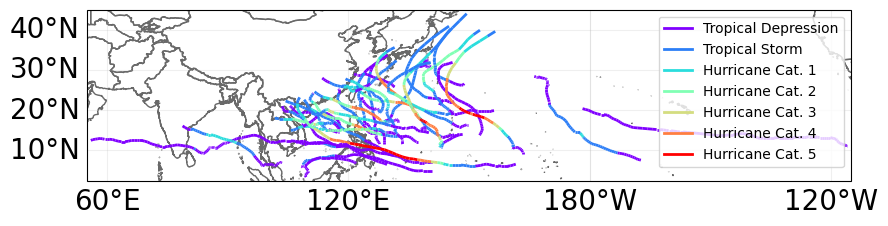

In [3]:
tracks_2013.plot()

<GeoAxes: >

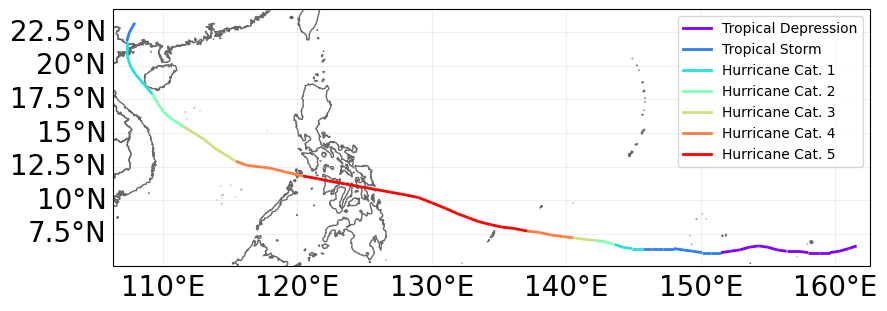

In [5]:
tracks_2013.subset({"sid": "2013306N07162"}).plot()

In [6]:
tr_haiyan = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2013306N07162')

In [7]:
tr_haiyan.get_track('2013306N07162')

<xarray.Dataset> Size: 4kB
Dimensions:                 (time: 73)
Coordinates:
  * time                    (time) datetime64[ns] 584B 2013-11-02T06:00:00 .....
    lat                     (time) float32 292B 6.6 6.4 6.2 ... 21.8 22.5 23.2
    lon                     (time) float32 292B 161.6 161.0 ... 107.5 107.9
Data variables:
    radius_max_wind         (time) float32 292B 0.0 0.0 0.0 ... 30.0 30.0 30.0
    radius_oci              (time) float32 292B 0.0 0.0 0.0 ... 175.0 180.0
    max_sustained_wind      (time) float32 292B 15.0 15.0 15.0 ... 53.0 45.0
    central_pressure        (time) float32 292B 1.01e+03 1.01e+03 ... 989.0
    environmental_pressure  (time) float64 584B 1.01e+03 1.01e+03 ... 1.008e+03
    time_step               (time) float64 584B 3.0 3.0 3.0 3.0 ... 3.0 3.0 3.0
    basin                   (time) <U2 584B 'WP' 'WP' 'WP' ... 'WP' 'WP' 'WP'
Attributes:
    max_sustained_wind_unit:  kn
    central_pressure_unit:    mb
    orig_event_flag:          True
    data_provider:            ibtracs_usa
    category:                 5
    name:                     HAIYAN
    sid:                      2013306N07162
    id_no:                    2013306007162.0

### Generate probabilistic events

Once tracks are present in `TCTracks`, one can generate synthetic tracks for each present track based on directed random walk. Note that the tracks should be interpolated to use the same timestep **before** generation of probabilistic events.

`calc_perturbed_trajectories()` generates an ensemble of “nb_synth_tracks” numbers of synthetic tracks is computed for every track. The methodology perturbs the tracks locations, and if decay is `True` it additionally includes decay of wind speed and central pressure drop after landfall. No other track parameter is perturbed.

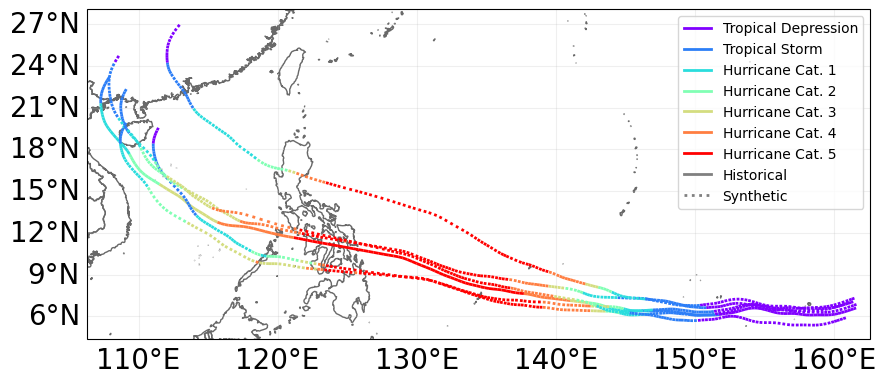

In [8]:
# here we use tr_haiyan retrieved from IBTrACS with the function above
# select number of synthetic tracks (nb_synth_tracks) to generate per present tracks.
tr_haiyan.equal_timestep()
tr_haiyan.calc_perturbed_trajectories(nb_synth_tracks=5)
tr_haiyan.plot();
# see more configutration options (e.g. amplitude of max random starting point shift in decimal degree; max_shift_ini)

### Plot affected areas

<GeoAxes: >

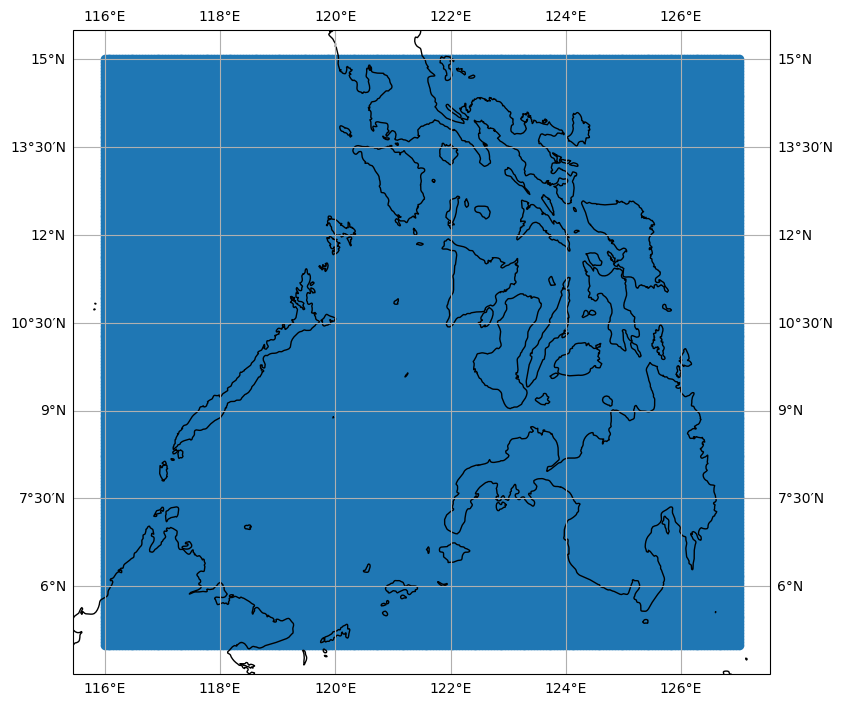

In [9]:
min_lat, max_lat, min_lon, max_lon = 5.0, 15.0, 116.0, 127.0
cent = Centroids.from_pnt_bounds((min_lon, min_lat, max_lon, max_lat), res=0.05)
#cent.check()
cent.plot()

In [10]:
haz = TropCyclone.from_tracks(tracks_2013, centroids=cent)
haz.check()

<GeoAxes: title={'center': 'Event ID 33: 2013306N07162'}>

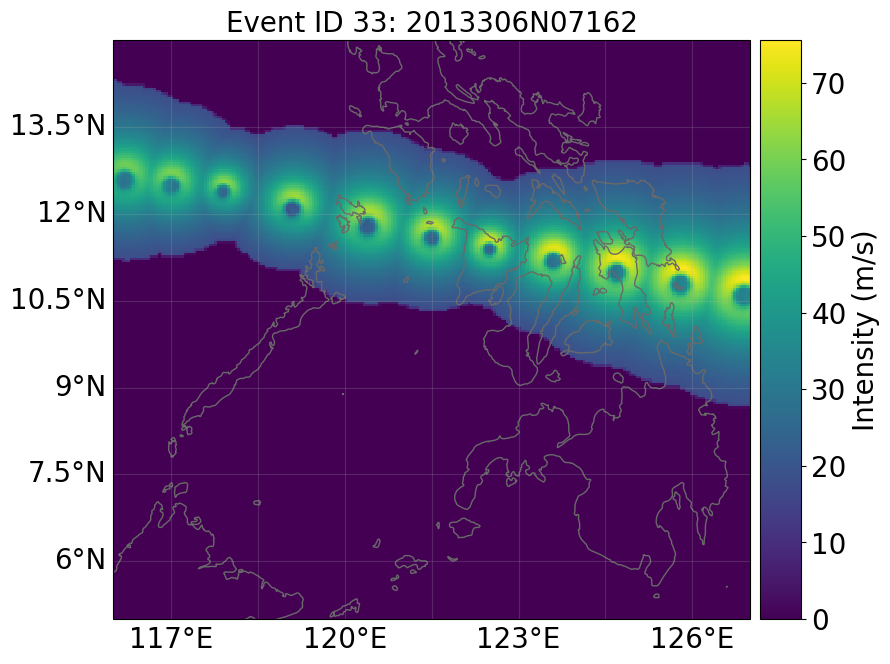

In [11]:
haz.plot_intensity(event='2013306N07162')

2025-02-05 13:44:00,856 - climada.hazard.base - WARNING - Return period 5.0 exceeds max. event return period.
2025-02-05 13:44:00,856 - climada.hazard.base - WARNING - Return period 10.0 exceeds max. event return period.
2025-02-05 13:44:00,860 - climada.hazard.base - WARNING - Return period 20.0 exceeds max. event return period.
2025-02-05 13:44:00,860 - climada.hazard.base - WARNING - Return period 40.0 exceeds max. event return period.


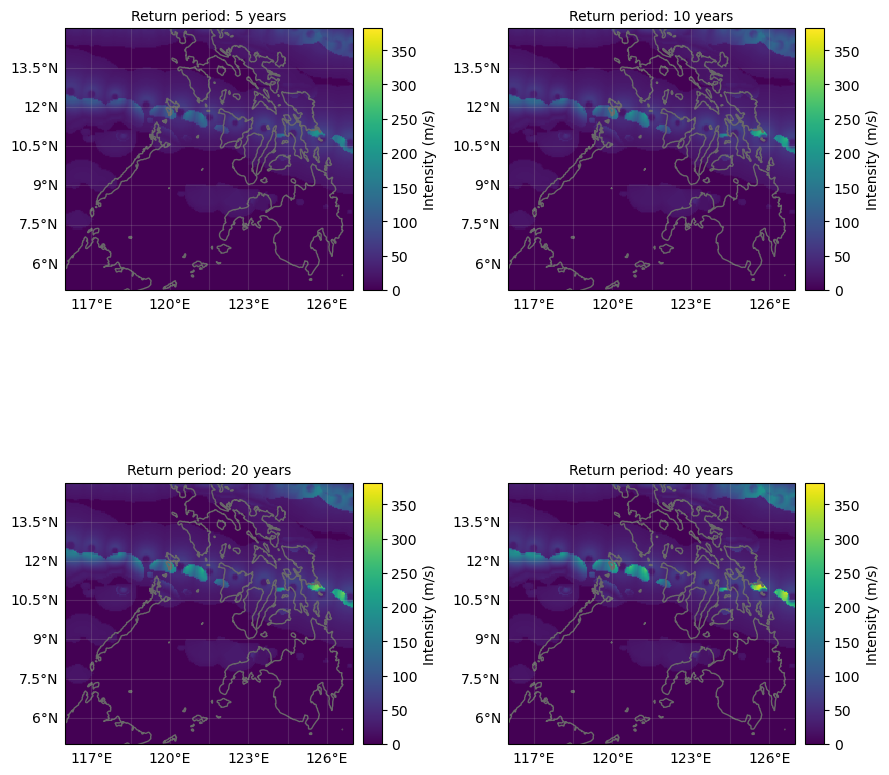

In [12]:
haz.plot_rp_intensity(return_periods=(5, 10, 20, 40));

### Implementing Climate Change

`apply_climate_scenario_knu` implements the changes on intensity and frequency due to climate change described in *Global projections of intense tropical cyclone activity for the late twenty-first century from dynamical downscaling of CMIP5/RCP4.5 scenarios* of Knutson et al 2015. Other RCP scenarios are approximated from the RCP 4.5 values by interpolating them according to their relative radiative forcing.

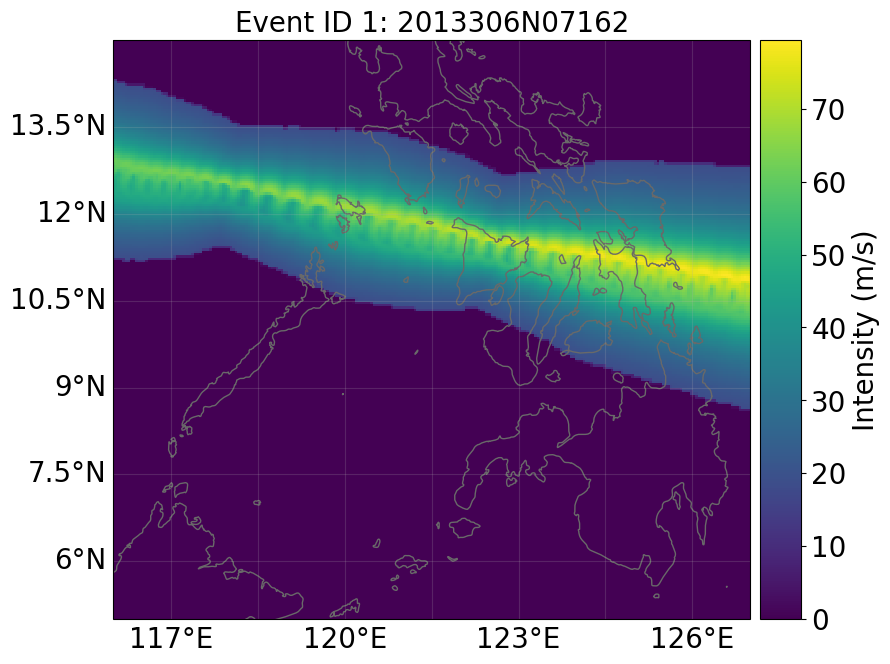

In [13]:
# a Haiyan event-like in 2055 under RCP 4.5:
tc_haiyan = TropCyclone.from_tracks(tr_haiyan, centroids=cent)
tc_haiyan_cc = tc_haiyan.apply_climate_scenario_knu(ref_year=2055, rcp_scenario=45)
tc_haiyan_cc.plot_intensity('2013306N07162');

11it [01:15,  6.83s/it]                                                                                                


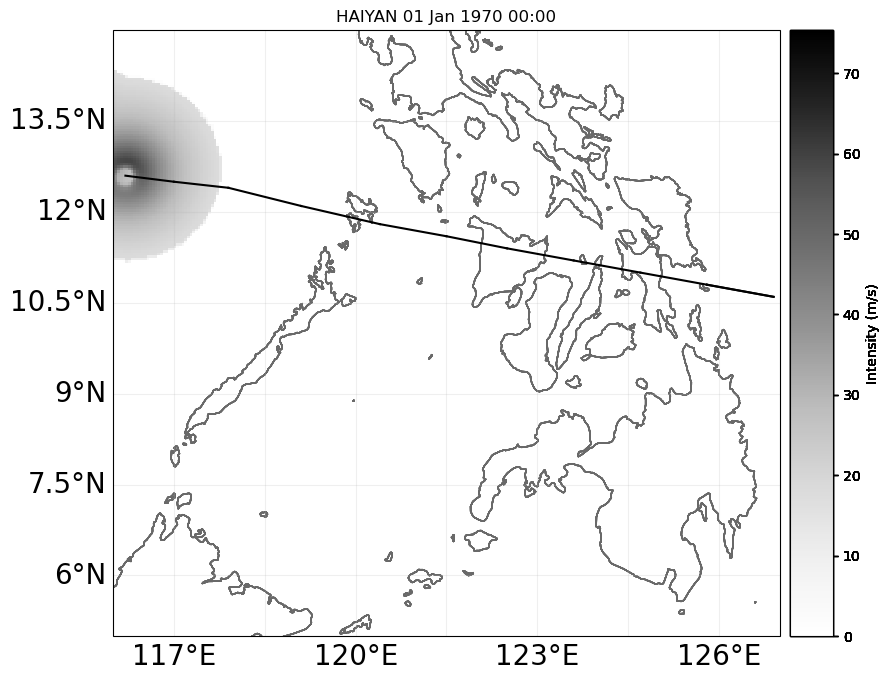

In [14]:
from climada.hazard import Centroids, TropCyclone, TCTracks

track_name = '2013306N07162'

tr_haiyan = TCTracks.from_ibtracs_netcdf(provider='usa', storm_id='2013306N07162')

lon_min, lat_min, lon_max, lat_max = 116.0, 5.0, 127.0, 15.0
centr_video = Centroids.from_pnt_bounds((lon_min, lat_min, lon_max, lat_max), 0.04)
#centr_video.check()

tc_video = TropCyclone()

tc_list, tr_coord = tc_video.video_intensity(track_name, tr_haiyan, centr_video, file_name='haiyan_tc_fl.gif')